# EDA:

In [107]:
# IMPORTS
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

## Primero hacemos el EDA

## Paso 1: Planteamiento del problema

- Objetivo: Identificar aquellos clientes existentes, potencialmente interesados en depósitos a largo plazo, para que la entidad bancaria centre sus esfuerzos de marketing en ellos, y no en posibles descartes.

- Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

- IMPORTAREMOS EL CONJUNTO DE DATOS PARA EMPEZAR A TRABAJAR CON ÉL.

In [108]:
# CARGAR EL DATASET
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores

total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Paso 2: Exploración y Limpieza de Datos

In [109]:
# CONOCER LAS DIMENSIONES DEL DATASET 
total_data.shape

(41188, 21)

In [110]:
# OBTENER INFORMACIÓN SOBRE LOS TIPOS DE DATOS Y VALORES NO NULOS
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [111]:
total_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Una vez obtenida esta información, se extraen las siguientes conclusiones: 

- Existen un total de 41188 filas y 21 columnas, de las que encontramos la target, y. 
- De las columnas: 10 son variables continuas y 11 son categóricas. 
- El dataset no contiene valores nulos

#### Eliminar duplicados 

Paso crucial, porque puede dar incoherencias en la evaluación de los datos.

In [112]:
total_data.duplicated().sum()

np.int64(12)

In [113]:
data_without_duplicates = total_data.drop_duplicates(subset = total_data.columns)

In [114]:
data_without_duplicates.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [115]:
data_without_duplicates.shape

(41176, 21)

ELIMINAR INFORMACIÓN IRRELEVANTE

Se procederá a eliminar aquellas columnas que se presume, no aportan significativamente, datos al modelo, en éste caso; `month` y `day_of_week`.

In [116]:
clean_data = data_without_duplicates.drop(["month", "day_of_week"], axis = 1, inplace = False)
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Paso 3: Análisis de variables univariante

- ANÁLISIS DE VARIABLES CATEGÓRICAS:

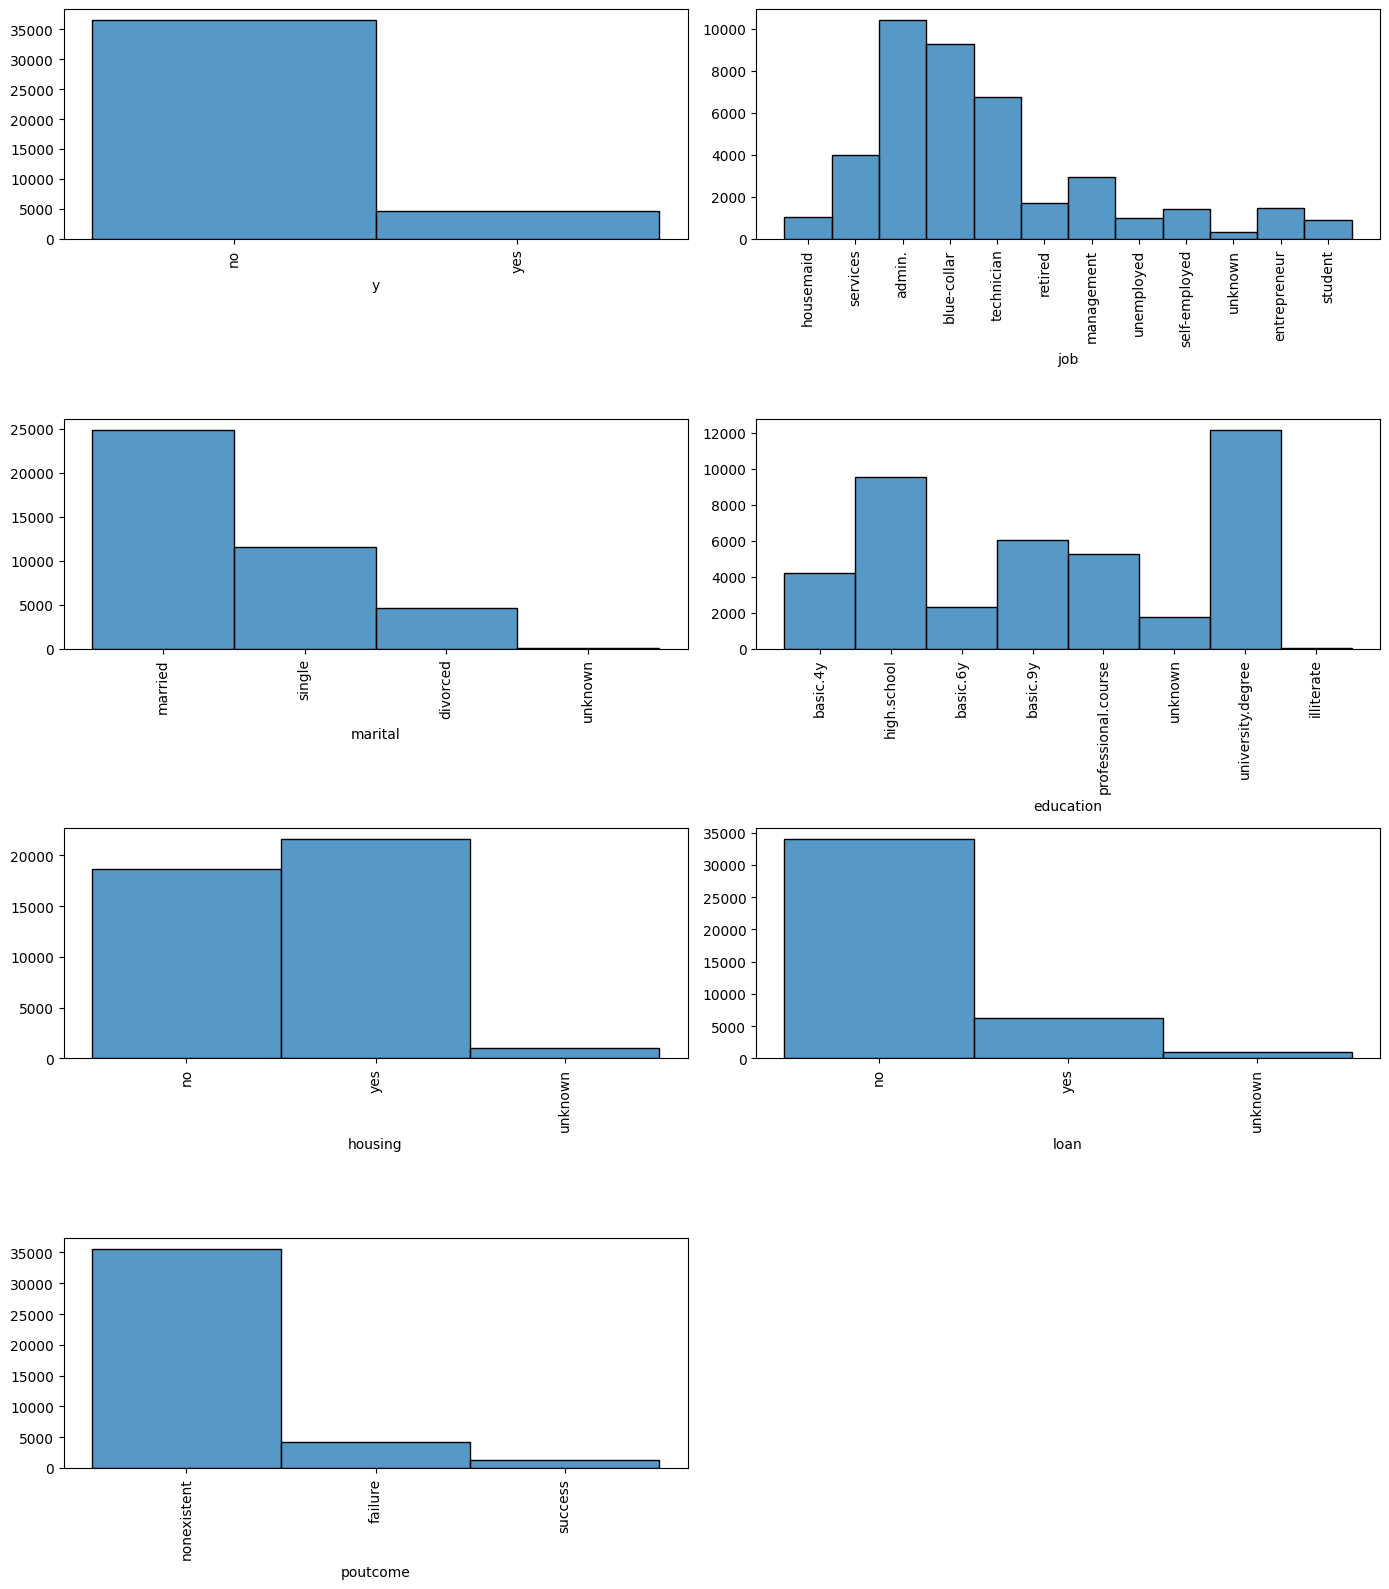

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas
categorical_vars = ["y", "job", "marital", "education", "housing", "loan", "poutcome"]

# Configurar número de filas y columnas
n_cols = 2  
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols  

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  

# Generar los histogramas
for i, var in enumerate(categorical_vars):
    sns.histplot(data=clean_data, x=var, ax=axes[i])
    axes[i].set_ylabel(None)  
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje X

# Eliminar ejes vacíos si hay menos variables que espacios en la cuadrícula
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()

OBSERVACIONES Y CONCLUSIONES DE LOS GRÁFICOS DEL ANÁLISIS DE VARIABLES CATEGÓTICAS

- Y: el 89% de los clientes de el dataset no contratan depósitos a largo plazo. El 11% de los clientes si contratan depósitos a largo plazo.
- Job: La mayor parte de los clientes trabajan en los sectores de administración, clase obrera trabajadora y técnica. 
- Marital: Unos 25000 clientes están casados, unos 10200 son solteros y aproximadamente 5000 son divorciados.
- Education: 12000 clientes tienen un grado universitario, posicionandose como primer lugar en esta categoría, luego, la educación secundaria, con unos 9800 clientes; y en menores cantidades las demás clasificaciones.
- Housing: 53% de los clientes tienen una hipoteca, el 45% no tiene hipoteca mientras que el restante 2% se desconoce este dato. 
- Loan: El 82% de los clientes no tienen prestamos personales; el 15% si tienen algún prestamo personal; y el 2% se desconoce. 
- poutcome: Sólo el 3% de los clientes optaron por un depósito a largo plazo en la campaña de marketing anterior. Puede intuirse que ese 3% se contienen entre el 11% de los clientes de la variable Y.   

- ANÁLISIS DE VARIABLES NUMÉRICAS:

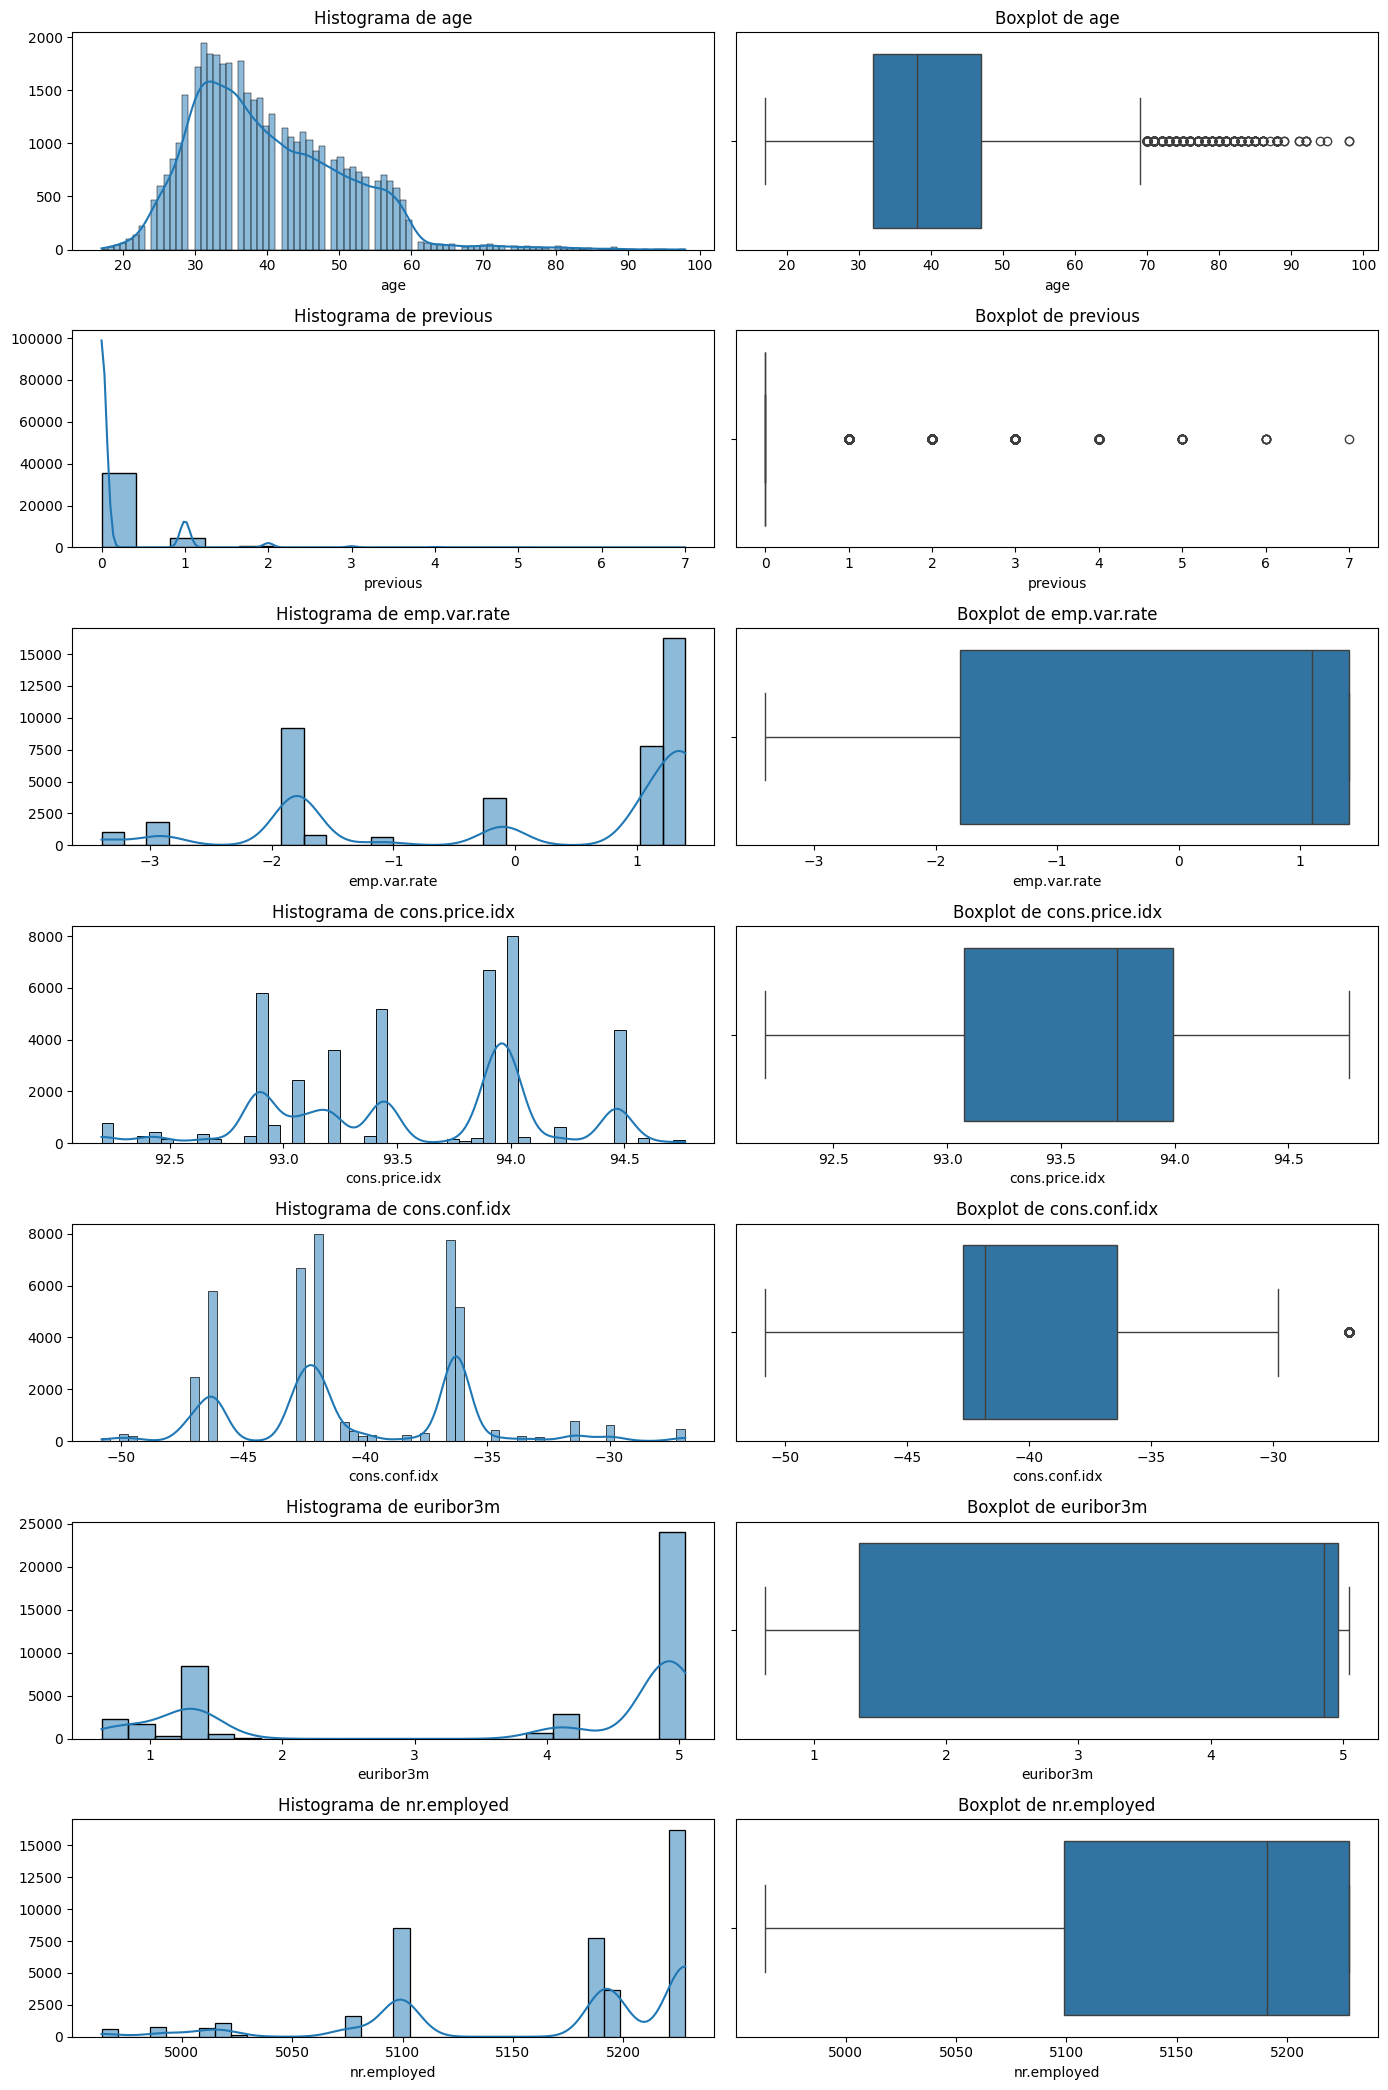

In [118]:
# Lista de variables numéricas
numerica_vars = ["age", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Configurar número de filas y columnas (2 gráficos por variable)
n_cols = 2  # Primera columna: Histograma, Segunda columna: Boxplot
n_rows = len(numerica_vars)  # Cada variable ocupa una fila

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
axes = axes.reshape(n_rows, n_cols)  # Asegurar que sea una matriz

# Generar histogramas y boxplots
for i, var in enumerate(numerica_vars):
    # Histograma
    sns.histplot(data=clean_data, x=var, ax=axes[i, 0], kde=True)  # kde=True para suavizado
    axes[i, 0].set_ylabel(None)
    axes[i, 0].set_title(f"Histograma de {var}")

    # Boxplot
    sns.boxplot(data=clean_data, x=var, ax=axes[i, 1])
    axes[i, 1].set_ylabel(None)
    axes[i, 1].set_title(f"Boxplot de {var}")

# Ajustar diseño para mejor visualización
plt.tight_layout()
plt.show()


OBSERVACIONES Y CONCLUSIONES DEL ANÁLISIS DE VARIABLES NUMÉRICAS

- Age: En el histograma la distribución está sesgada a la derecha, con la mayoría de los datos entre los 25 y los 60 años. El boxplot presenta valores atípicos en la parte superior, posiblemente clientes mayores de 70-80 años.
- Previos: En el histograma la distribución está altamente sesgada a la derecha, con una gran cantidad de valores en 0, es decir, no hubo éxisto contactando a dichos clientes en la campaña anterior; y poco valores mayores. El boxplot evidencia múltiples valores atípicos, indicando que hay clientes con muchas interacciones previas en comparación con la mayoría. 
- Emp.var.rate (Tasa de variación del empleo): Con una distribución discreta con valores específicos más frecuentes, y con un boxplot sin valores atípicos significativos. 
- Cons.price.idx (Índice de precio al consumidor): Tiene una distribución multimodal con picos en ciertos valores. El boxplot presenta una dispersion moderada sin valores atípicos evidentes.
- Cons.conf.idx (Índice de confianza del cosumidor): Se observa una distribución multimodal, con valores concentrados en rangos específicos. 
- Euribor3m (Tasa Euribor a 3 meses): Distribución sesgada con valores concentrados en ciertos puntos. El boxplot no evidencia valores atípicos significativos.
- Nr.employed: No refleja datos significativos en ambos gráficos.

## Paso 4: Análisis de variables multivariante

- ANÁLISIS DE VARIABLES CATEGÓRICA-CATEGÓRICA

Primero se analizará la target frente a las características categóricas.

#### y - (`job`, `marital`, `education`, `housing`, `loan`, `poutcome`)

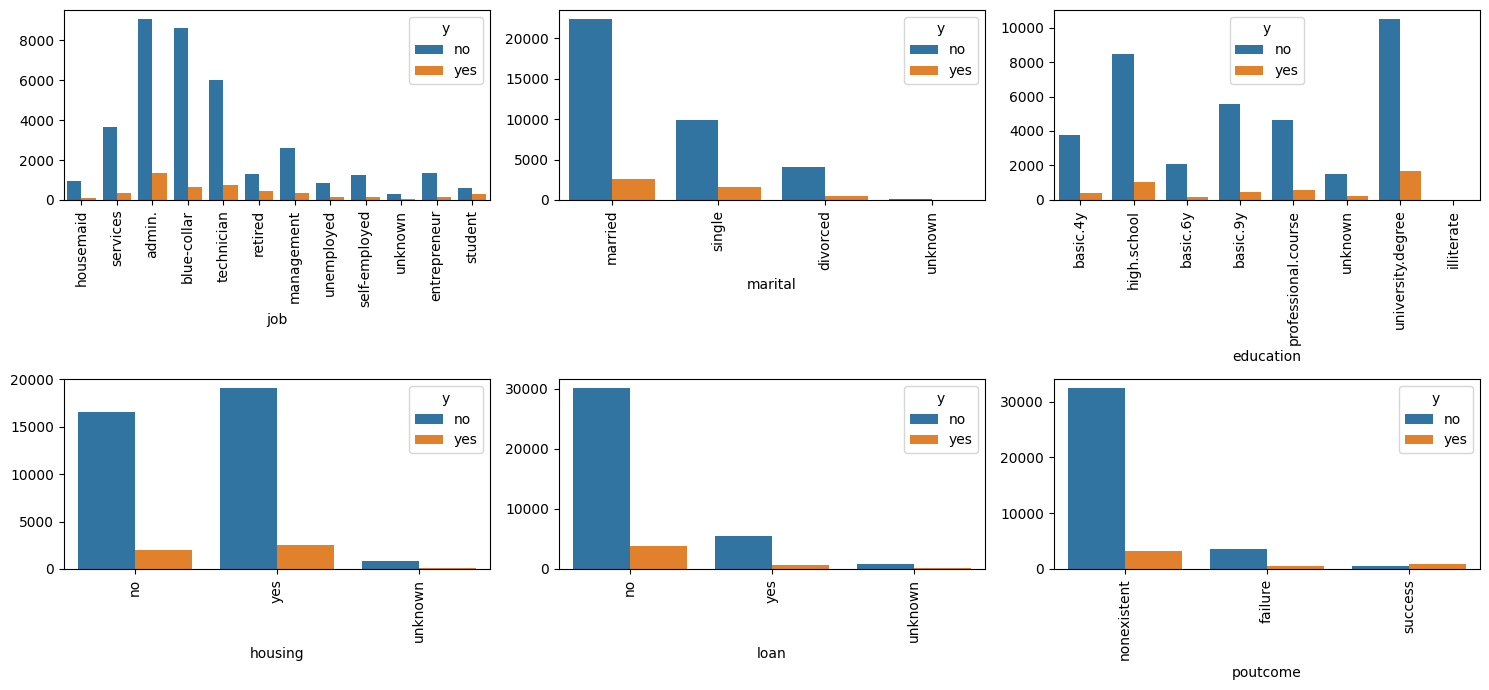

In [119]:
# Variables categóricas a graficar
categorical_vars = ["job", "marital", "education", "housing", "loan", "poutcome"]

# Crear la figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

# Generar gráficos usando un bucle
for ax, var in zip(axes.flat, categorical_vars):
    sns.countplot(ax=ax, data=clean_data, x=var, hue="y")
    ax.set_ylabel(None)  # Quitar etiquetas innecesarias
    ax.tick_params(axis="x", rotation=90)  # Rotar etiquetas X

# Ajustar diseño
plt.tight_layout()
plt.show()

OBSERVACIONES Y CONCLUSIONES DE ANÁLISIS MULTIVARIANTE CATEGÓTICO-CATEGÓRICO

- Job-Y: La mayoría de los clientes no aceptaron la oferta, aunque se observa que los jubilados (retired), y los estudiantes (student), tienen una mayor proporción de respuestas positivas.
- Marital-Y: Los solteros parecen tener una proporción ligeramente mayor de respuestas positivas en comparación con los casados y divorciados.
- Education-Y: La tasa de aceptación parece ser mayor entre los clientes que tienen educación universitaria y cursos profesionales.
- Housing-Y: Un gran número de clientes tiene un préstamo hipotecario; sin embargo, la diferencia entre la tasa de aceptación entre quienes tienen y los que no tienen un préstamo hipotecario no es significativa. 
- Loan-Y: Los clientes sin préstamos personales parecen tener una mayor tasa de aceptación, en comparación con los clientes que sí tienen un prestamo personal.
- Poutcome: La mayoría de los clientes no participaron en campañas previas. Quienen tuvieron una mayor tasa de aceptación de ésta campaña, son los clientes que ya han participado en campañas anteriores, lo que sugiere que el historial de éxito en campañas anteriores, puede ser un buen predictor de futuras campañas. 



- ANÁLISIS DE VARIABLES MULTIVARIANTE NUMÉRICO-NUMÉRICO (variables continuas)


In [120]:
# Conversión de la target de variable categórica a variable continua:
clean_data["y_n"] = pd.factorize(clean_data["y"])[0]

y_n_transformation_rules = {row["y"]: row["y_n"] for _, row in clean_data[["y", "y_n"]].drop_duplicates().iterrows()}

with open("y_n_transformation_rules.json", "w") as f:
    json.dump(y_n_transformation_rules, f)

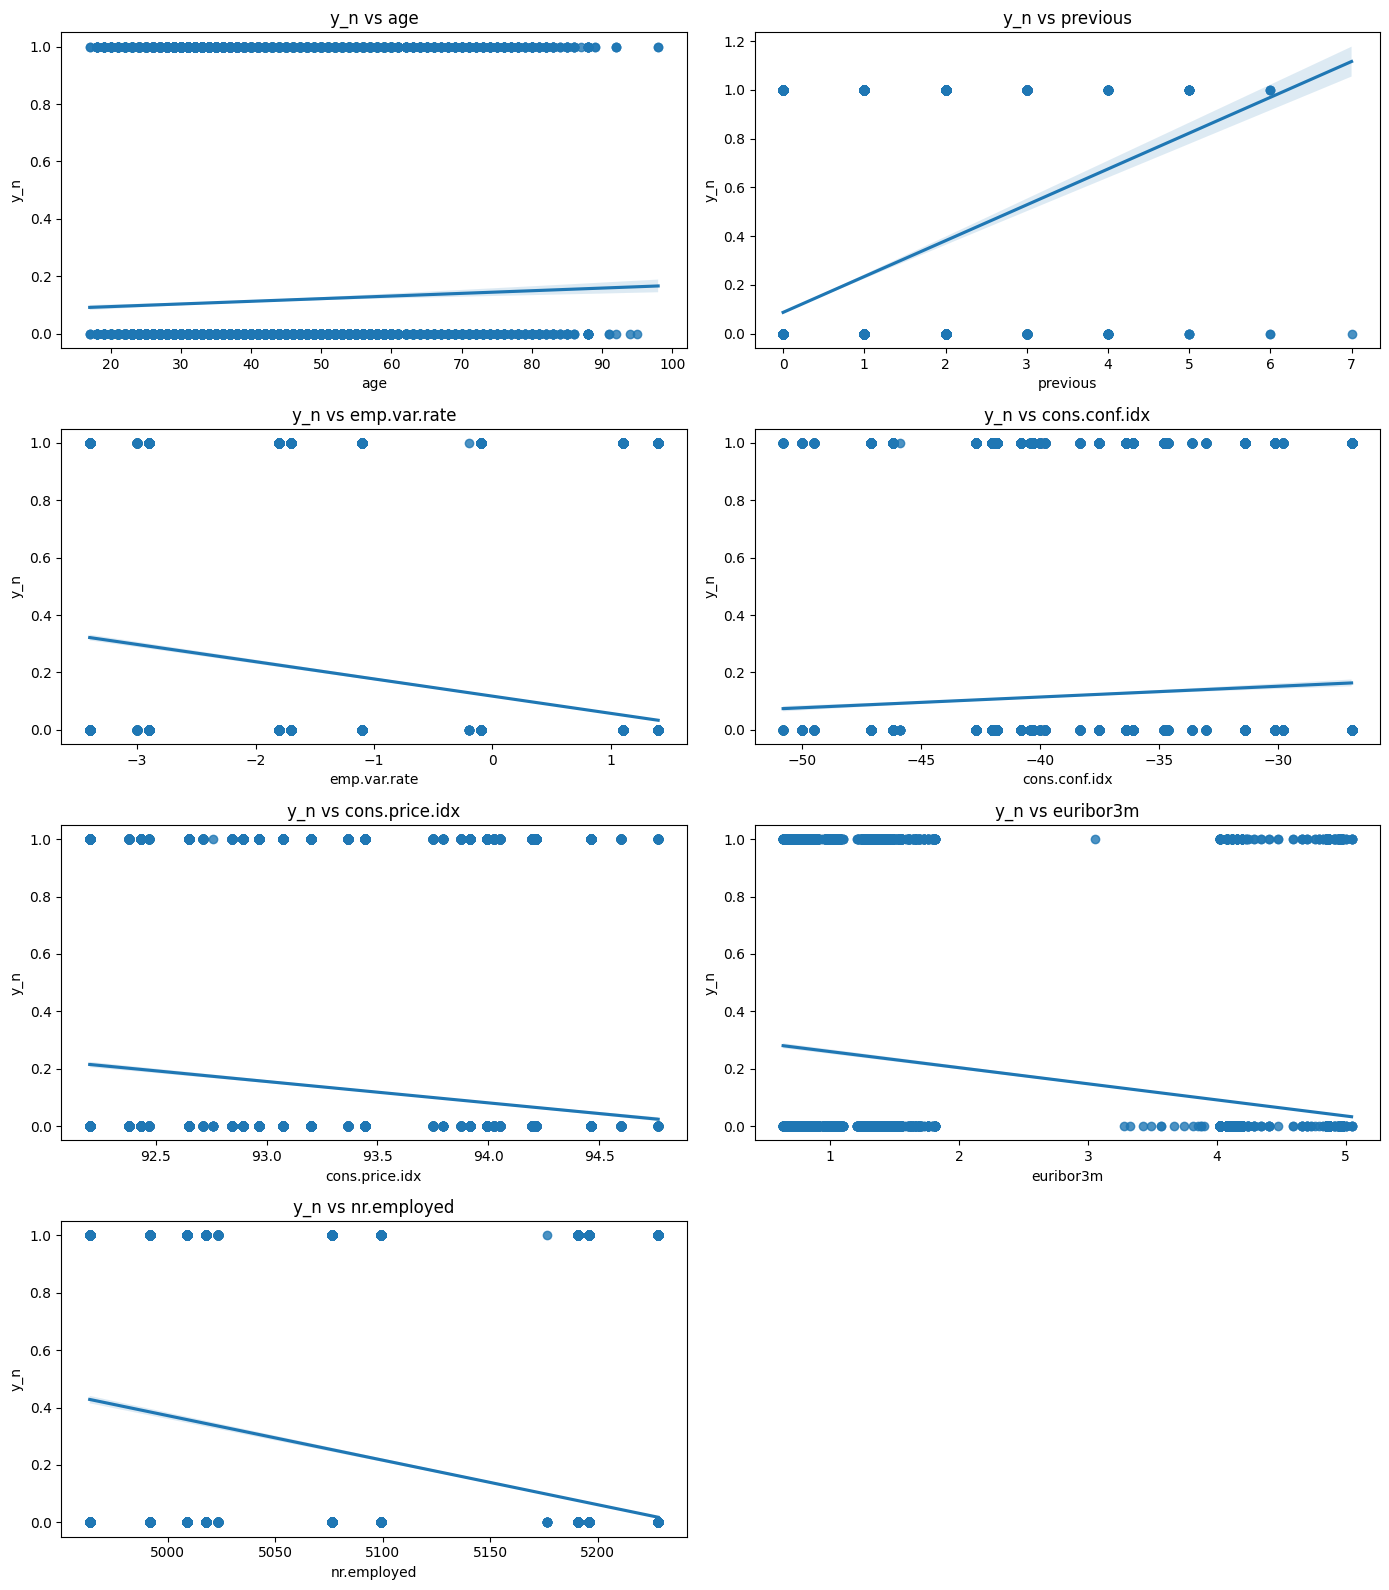

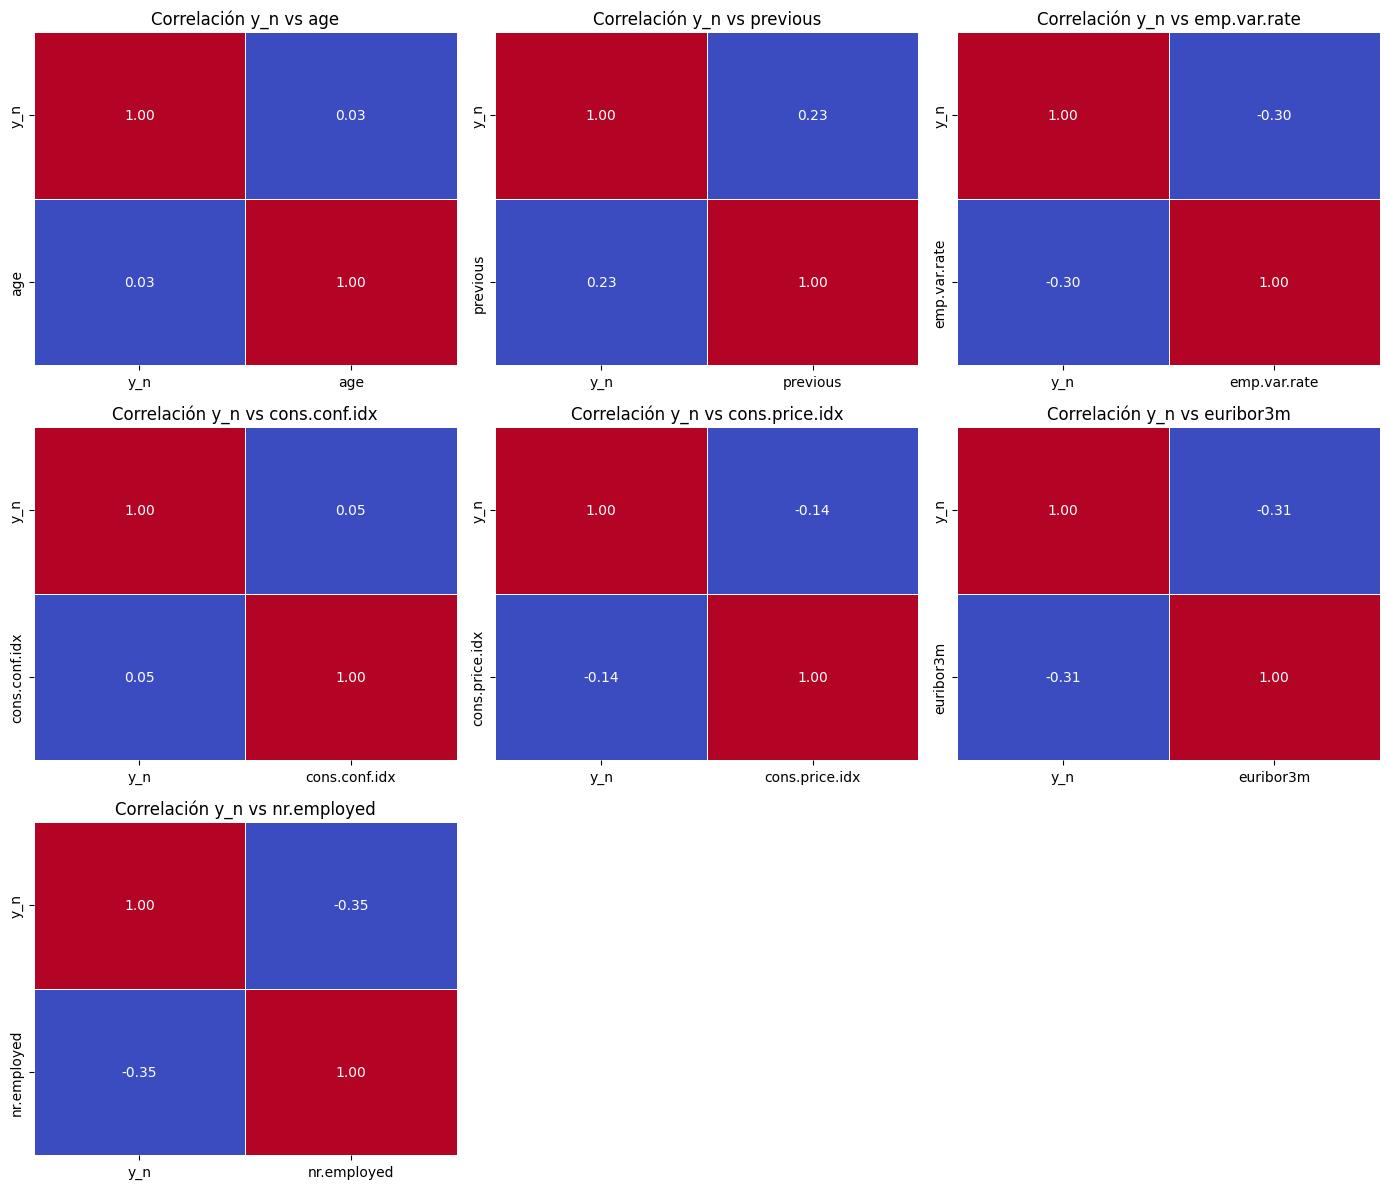

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables
num_vars = ["age", "previous", "emp.var.rate", "cons.conf.idx", "cons.price.idx", "euribor3m", "nr.employed"]
target_n = "y_n"

n_cols = 2  # Fijamos columnas para orden limpio
n_rows = np.ceil(len(num_vars) / n_cols).astype(int)  # Calculamos filas dinámicamente

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  

# Graficar regplot num_var vs target_n
for i, var in enumerate(num_vars):
    sns.regplot(data=clean_data, x=var, y=target_n, ax=axes[i])
    axes[i].set_title(f"{target_n} vs {var}")

# Eliminar ejes vacíos si hay menos gráficos que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()

# ------ PLOTEO 2: Heatmaps de correlación ------
n_cols = 3  # Más columnas para mejor ajuste
n_rows = np.ceil(len(num_vars) / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.heatmap(clean_data[[target_n, var]].corr(), annot=True, fmt=".2f", cmap="coolwarm",
                cbar=False, linewidths=0.5, ax=axes[i])
    axes[i].set_title(f"Correlación {target_n} vs {var}")

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Los gráficos exploran la reción entre el índice de confianza al consumidor con otras variables. No hay relación clara con ninguna variable. Con respecto a la edad, hay una ligera tendencia positiva. Hay una relación levemente negativa con los contactos previos, es decir, que a mayor número de contactos previos, menor índice de confianza. La relación entre la tasa de variación del empleo y la confianza del consumidor, es débilmente positiva. La relación con el índice de precios del consumidor, es practicamente nula. Con respecto al Euribor la relación es ligeramente positiva; y una relación casi nula con el número de empleados. 

No hay correlaciones fuertes. La variable con la correlación más alta es el Euribor, con un 0.28, y ésta sigue siendo débil. 

Estas observaciones indican que el Índice de Confianza al Consumidor (cons.conf.idx) no está fuertemente influenciado por factores como la edad, número de contactos previos o números de empleados. 




- COMBINACIONES DE LA CLASE CON VARIAS PREDICTORAS

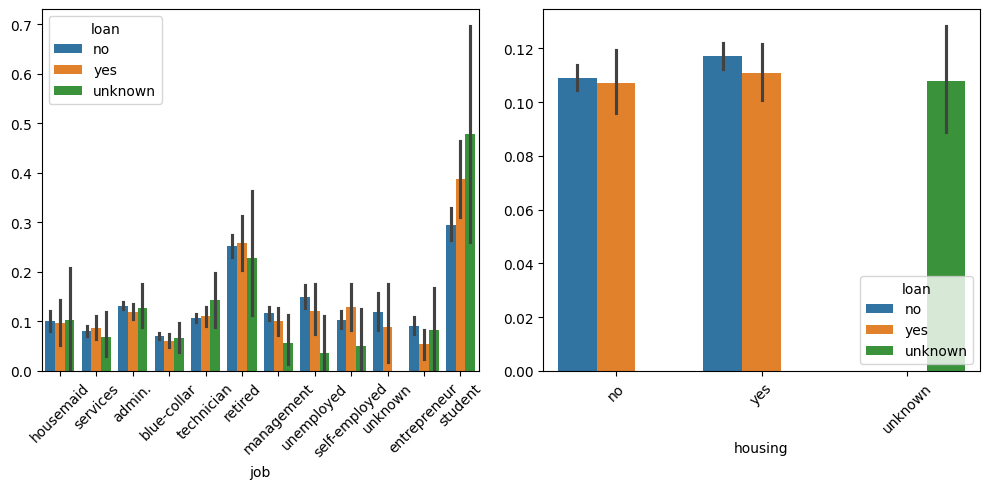

In [122]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = clean_data, x = "job", y = 'y_n', hue = 'loan').set(ylabel = None)
for tick in axis[0].get_xticklabels():
    tick.set_rotation(45)

sns.barplot(ax = axis[1], data = clean_data, x = "housing", y = 'y_n', hue = 'loan').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.show()

Se puede observar cómo la aceptación del depósito a largo plazo (y) varía significativamente según la ocupación del cliente. 

- ANÁLISIS DE CORRELACIONES:

In [123]:
clean_data

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [124]:
# FACTORIZACIÓN DE VARIABLES CATEGÓRICAS

clean_data["loan_n"] = pd.factorize(clean_data["loan"])[0]
clean_data["housing_n"] = pd.factorize(clean_data["housing"])[0]
clean_data["marital_n"] = pd.factorize(clean_data["marital"])[0]
clean_data["education_n"] = pd.factorize(clean_data["education"])[0]
clean_data["default_n"] = pd.factorize(clean_data["default"])[0]
clean_data["contact_n"] = pd.factorize(clean_data["contact"])[0]
clean_data["poutcome_n"] = pd.factorize(clean_data["poutcome"])[0]
clean_data["job_n"] = pd.factorize(clean_data["job"])[0]


# GUARDAR LAS FACTORIZACIONES EN JSON
loan_transformation_rules = {row["loan"]: row["loan_n"] for _, row in clean_data[["loan", "loan_n"]].drop_duplicates().iterrows()}

with open("loan_transformation_rules.json", "w") as f:
  json.dump(loan_transformation_rules, f)

housing_transformation_rules = {row["housing"]: row["housing_n"] for _, row in clean_data[["housing", "housing_n"]].drop_duplicates().iterrows()}

with open("housing_transformation_rules.json", "w") as f:
  json.dump(housing_transformation_rules, f)

marital_transformation_rules = {row["marital"]: row["marital_n"] for _, row in clean_data[["marital", "marital_n"]].drop_duplicates().iterrows()}

with open("marital_transformation_rules.json", "w") as f:
  json.dump(marital_transformation_rules, f)

education_transformation_rules = {row["education"]: row["education_n"] for _, row in clean_data[["education", "education_n"]].drop_duplicates().iterrows()}

with open("education_transformation_rules.json", "w") as f:
  json.dump(education_transformation_rules, f)

default_transformation_rules = {row["default"]: row["default_n"] for _, row in clean_data[["default", "default_n"]].drop_duplicates().iterrows()}

with open("default_transformation_rules.json", "w") as f:
  json.dump(default_transformation_rules, f)

contact_transformation_rules = {row["contact"]: row["contact_n"] for _, row in clean_data[["contact", "contact_n"]].drop_duplicates().iterrows()}

with open("contact_transformation_rules.json", "w") as f:
  json.dump(contact_transformation_rules, f)

poutcome_transformation_rules = {row["poutcome"]: row["poutcome_n"] for _, row in clean_data[["poutcome", "poutcome_n"]].drop_duplicates().iterrows()}

with open("poutcome_transformation_rules.json", "w") as f:
  json.dump(poutcome_transformation_rules, f)

job_transformation_rules = {row["job"]: row["job_n"] for _, row in clean_data[["job", "job_n"]].drop_duplicates().iterrows()}

with open("job_transformation_rules.json", "w") as f:
  json.dump(job_transformation_rules, f)

In [125]:
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,y,y_n,loan_n,housing_n,marital_n,education_n,default_n,contact_n,poutcome_n,job_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,...,no,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,149,1,...,no,0,0,0,0,1,1,0,0,1
2,37,services,married,high.school,no,yes,no,telephone,226,1,...,no,0,0,1,0,1,0,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,...,no,0,0,0,0,2,0,0,0,2
4,56,services,married,high.school,no,no,yes,telephone,307,1,...,no,0,1,0,0,1,0,0,0,1


### Análisis de correlaciones de variables categóricas.

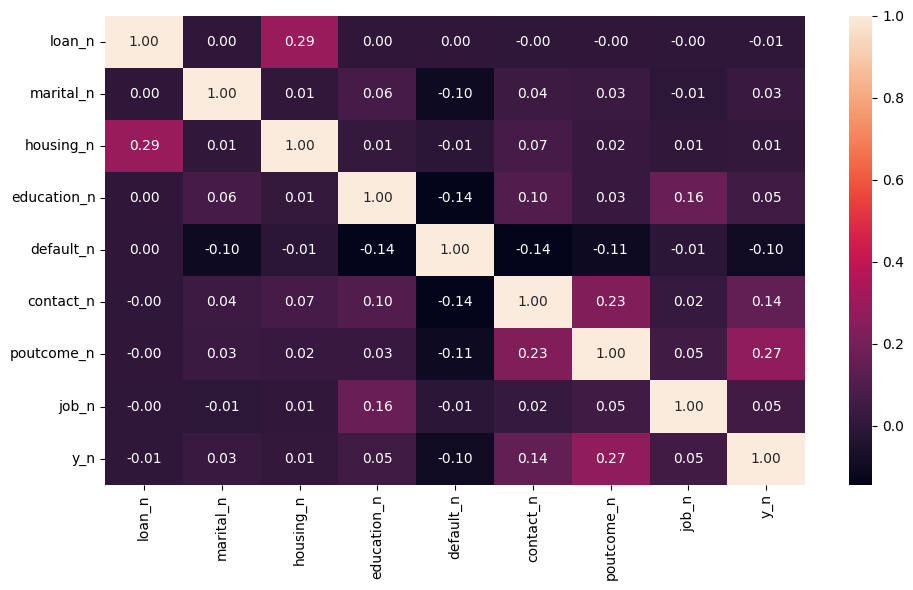

In [126]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(clean_data[["loan_n", "marital_n", "housing_n", "education_n", "default_n", "contact_n", "poutcome_n", "job_n", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

### Análisis de correlaciones de variables continuas.

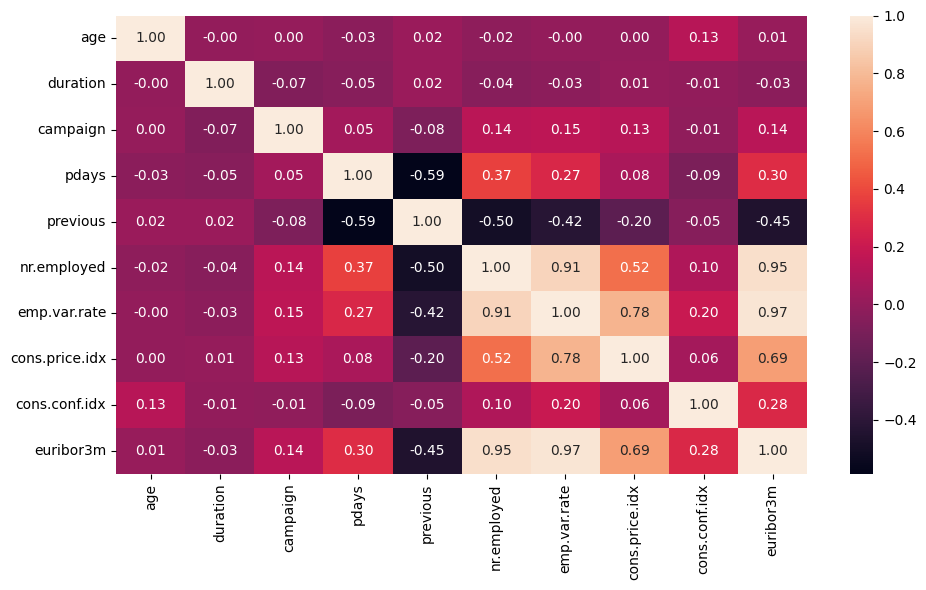

In [127]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["age", "duration", "campaign", "pdays", "previous", "nr.employed", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

### Análisis de correlaciones de variables continuas-categóricas completo.

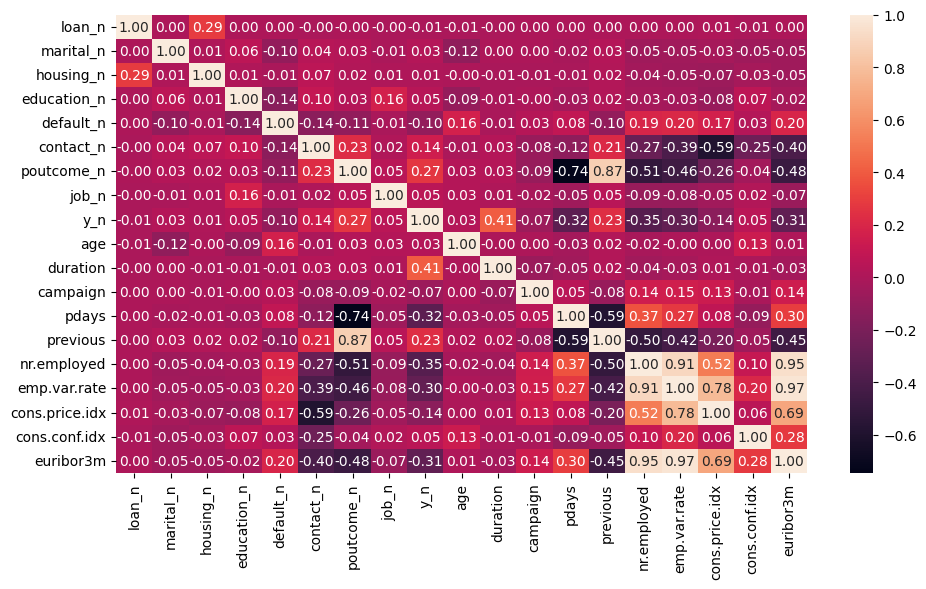

In [128]:


fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(clean_data[["loan_n", "marital_n", "housing_n", "education_n", "default_n", "contact_n", "poutcome_n", "job_n", "y_n", "age", "duration", "campaign", "pdays", "previous", "nr.employed", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Existe una relación entre las variables económicas (`emp.var.rate`, `euribor3m`, `nr.employed`) significativa, mostrando una influencia en la decisión de los clientes en contratar depósitos a largo plazo. 

Una vez analizada la correlación, analicemos los tres casos vistos para corroborar la teoría:

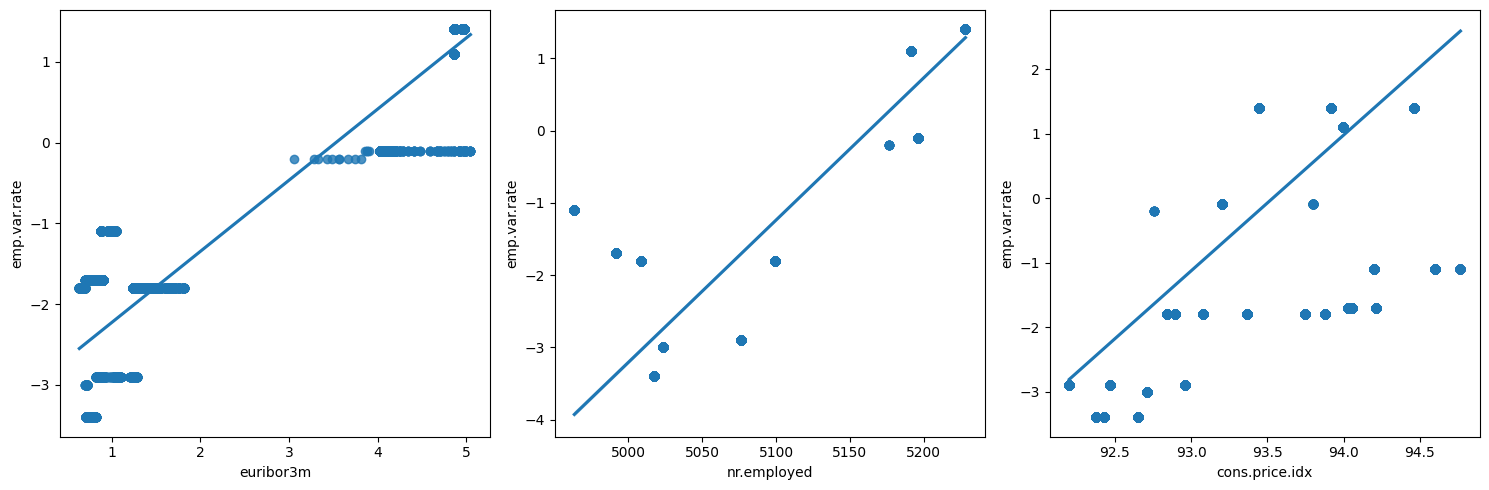

In [129]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)  # Cambiar ncols a 3

sns.regplot(ax=axes[0], data=clean_data, x="euribor3m", y="emp.var.rate")
sns.regplot(ax=axes[1], data=clean_data, x="nr.employed", y="emp.var.rate")
sns.regplot(ax=axes[2], data=clean_data, x="cons.price.idx", y="emp.var.rate")

plt.tight_layout()
plt.show()

Los tres gráficos evidencian una correlación positiva.

- Emp.var.rate-Euribor3m: A medida que la tasa EURIBOR aumenta, la tasa de variación de empleo también tiende a aumentar.
- Emp.var.rate-Nr.employed: A medida que aumenta el número de empleados, la tasa de variación del empleo también tiende a aumentar.
- Emp.var.rate-Cons.price.idx: A medida que aumenta el índice de precios al consumidor, la tasa de variación del empleo también tiende a aumentar, pero la relación es menos fuerte que en los gráficos anteriores. La dispersión de los puntos es mayor, lo que indica una relación menos precisa.

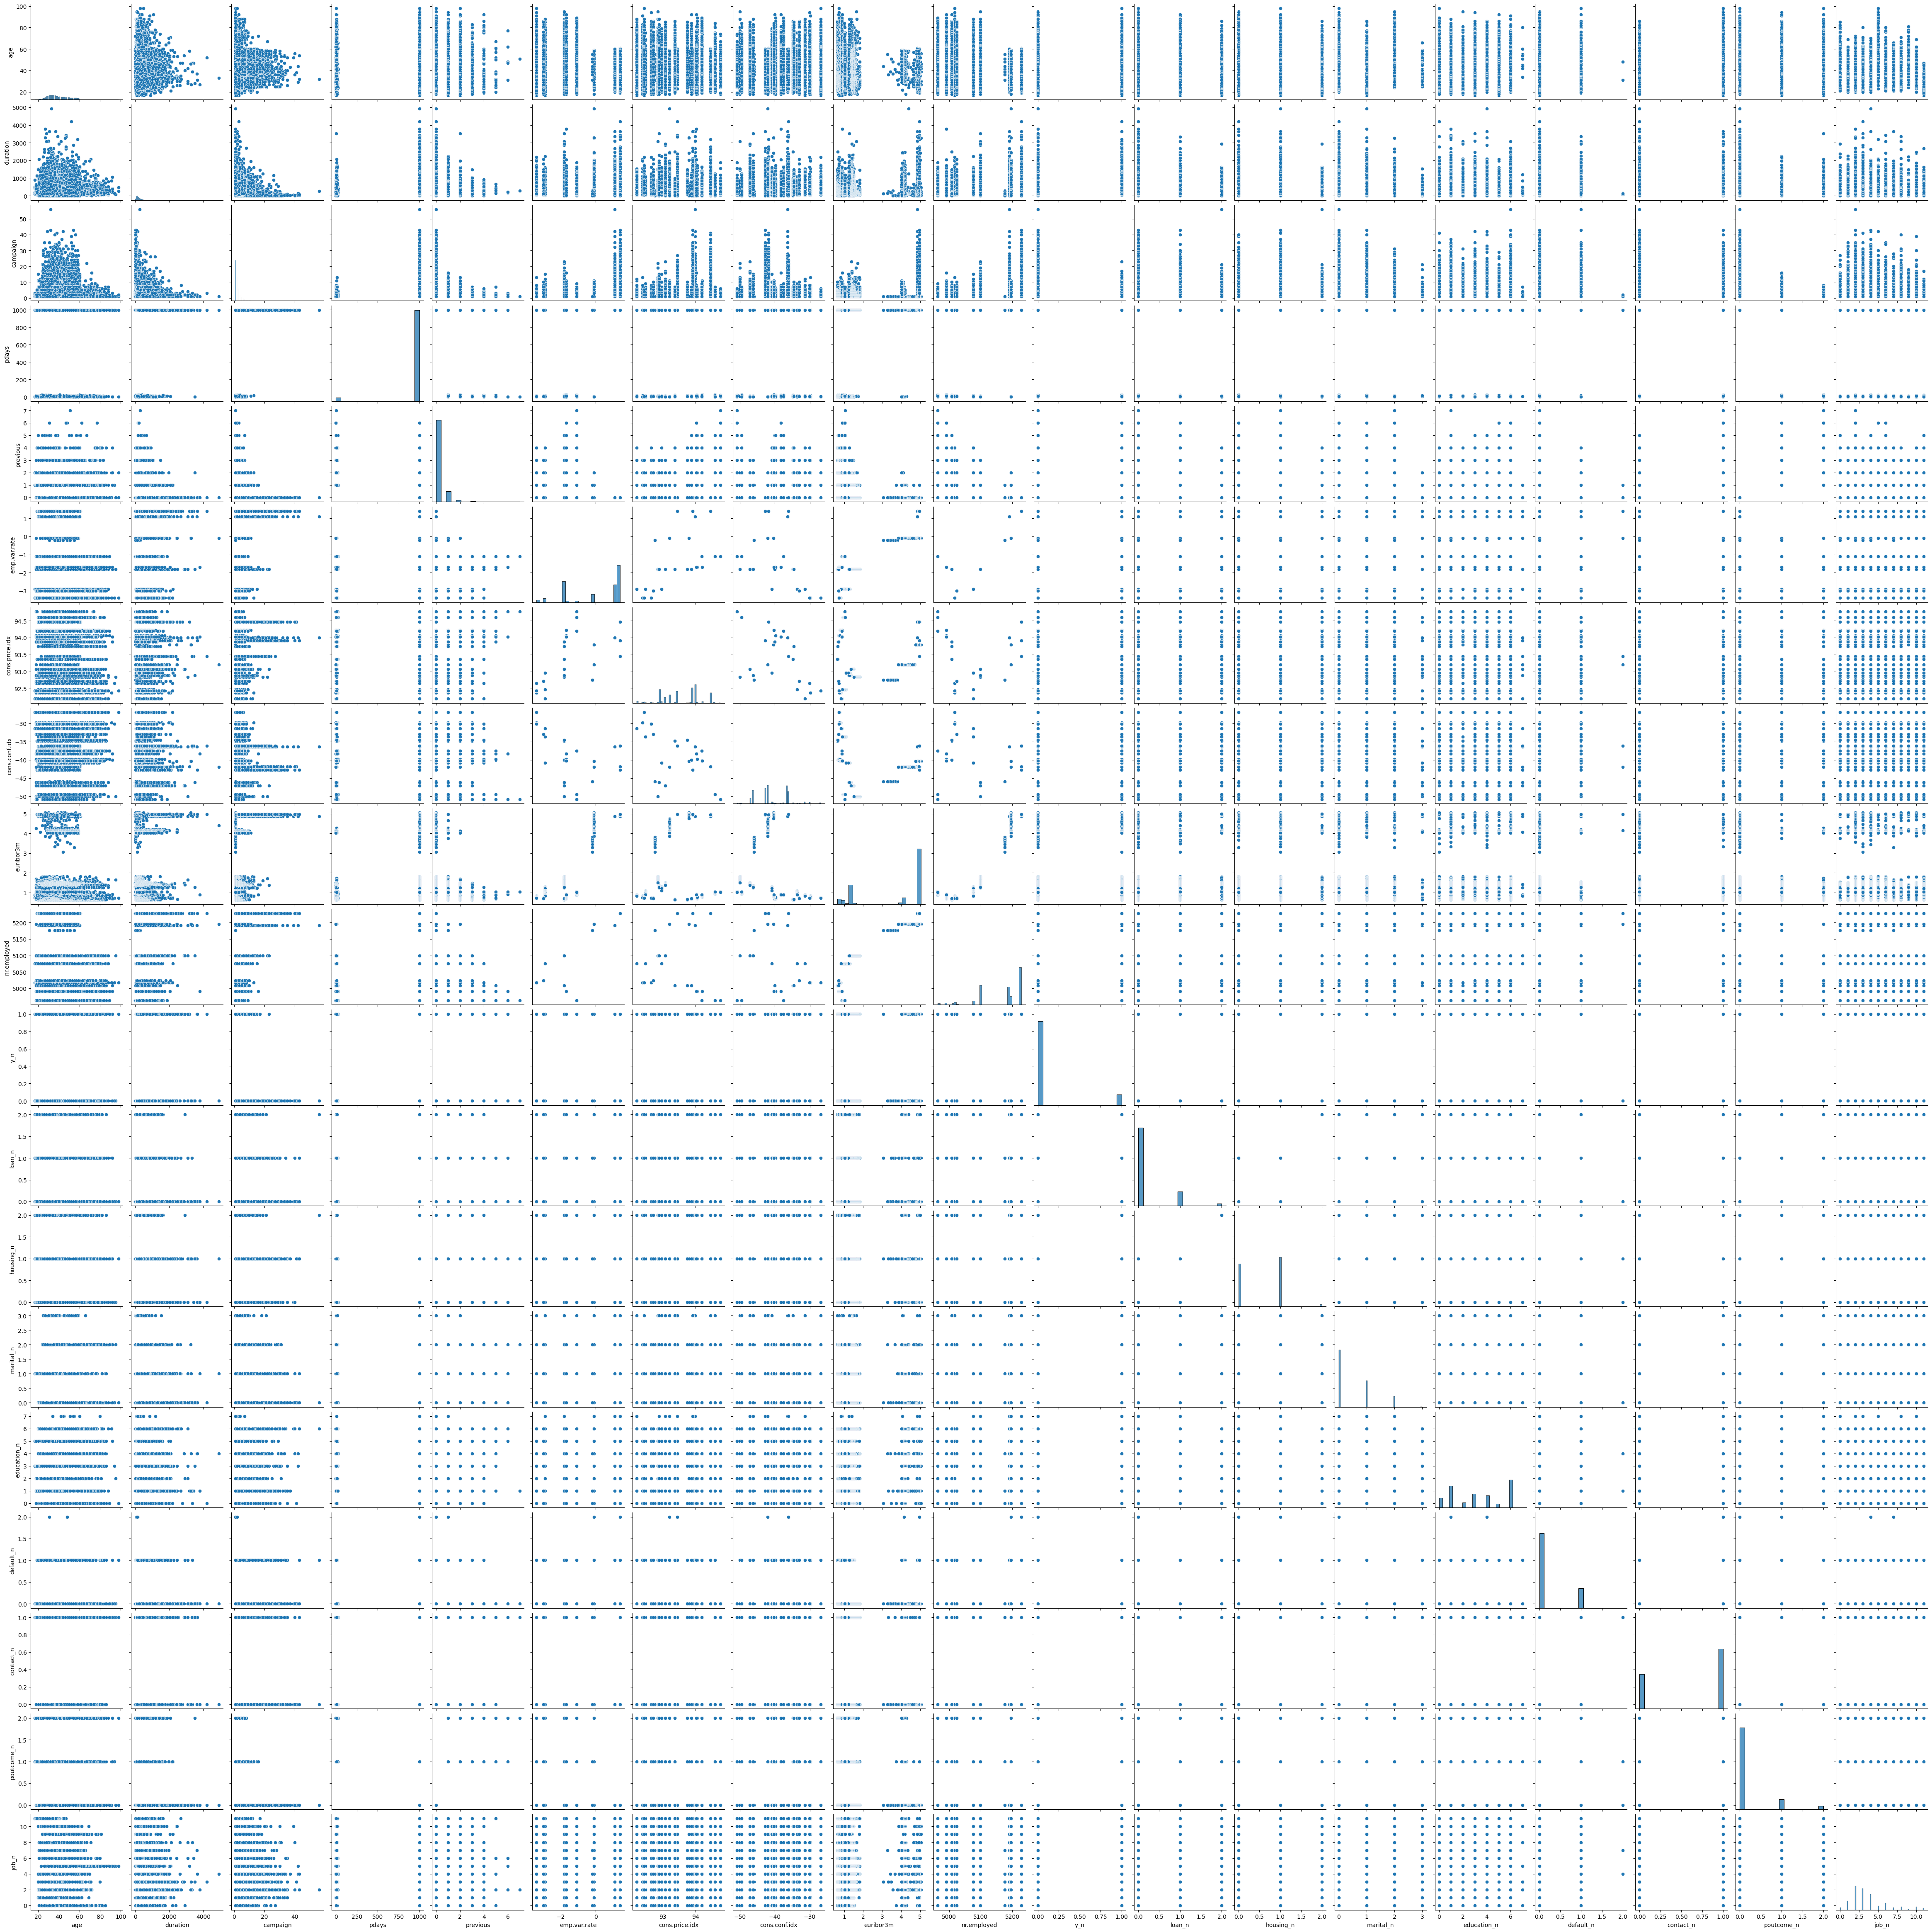

In [130]:
sns.pairplot(data = clean_data)

## Paso 5: Ingeniería de características (*feature engineering*)

- ANÁLISIS DE OUTLIERS

Un **valor atípico** (*outlier*) es un punto de datos que se desvía significativamente de los demás. Es un valor que es notablemente diferente de lo que sería de esperar dada la tendencia general de los datos. Estos outliers pueden ser causados por errores en la recolección de datos, variaciones naturales en los datos, o pueden ser indicativos de algo significativo, como una anomalía o evento extraordinario.

El **análisis descriptivo** es una poderosa herramienta para caracterizar el conjunto de datos: la media, desviación y los cuartiles nos brindan una poderosa información sobre cada variable. La función `describe()` de un DataFrame nos ayuda a calcular en unos tiempos muy reducidos todos estos valores.

In [131]:
clean_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n,loan_n,housing_n,marital_n,education_n,default_n,contact_n,poutcome_n,job_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663,0.199825,0.571959,0.510637,3.277370,0.208908,0.634714,0.169953,3.673863
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184,0.456055,0.541216,0.696794,2.185558,0.406713,0.481516,0.455811,2.454340
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,1.000000,0.000000,4.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,2.000000,2.000000,3.000000,7.000000,2.000000,1.000000,2.000000,11.000000


- BOXPLOT VARIABLES CATEGÓTICAS:

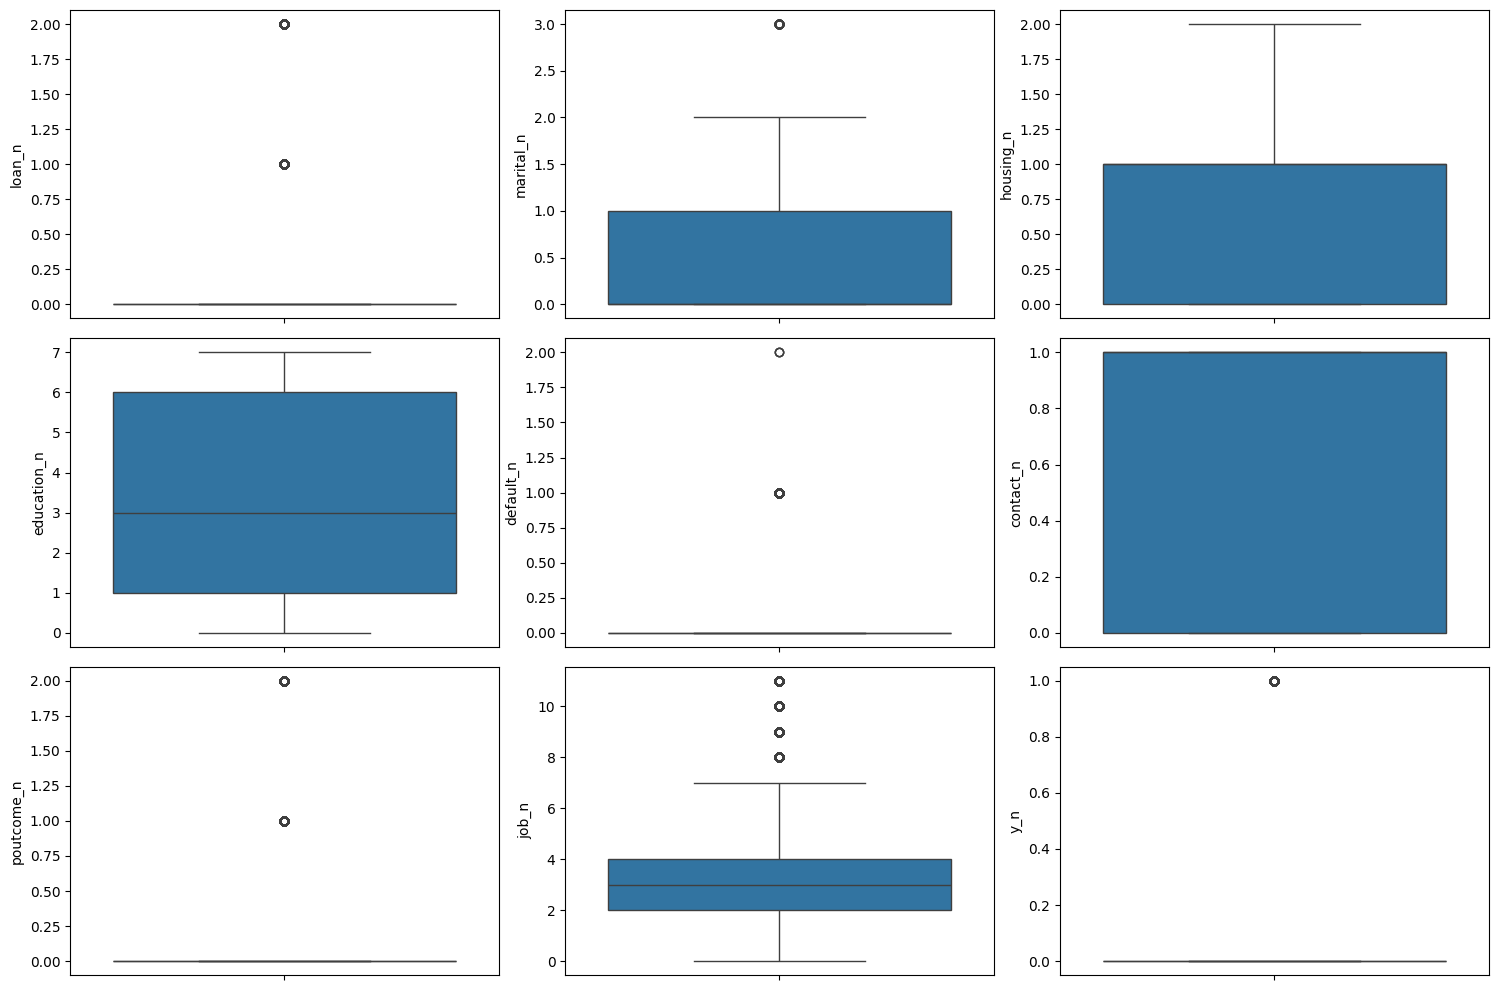

In [132]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = clean_data, y = "loan_n")
sns.boxplot(ax = axis[0, 1], data = clean_data, y = "marital_n")
sns.boxplot(ax = axis[0, 2], data = clean_data, y = "housing_n")
sns.boxplot(ax = axis[1, 0], data = clean_data, y = "education_n")
sns.boxplot(ax = axis[1, 1], data = clean_data, y = "default_n")
sns.boxplot(ax = axis[1, 2], data = clean_data, y = "contact_n")
sns.boxplot(ax = axis[2, 0], data = clean_data, y = "poutcome_n")
sns.boxplot(ax = axis[2, 1], data = clean_data, y = "job_n")
sns.boxplot(ax = axis[2, 2], data = clean_data, y = "y_n")

plt.tight_layout()

plt.show()

Podemos determinar fácilmente que las variables afectadas por outliers son `loan_n`, `marital_n`, `default_n`, `poutcome_n`, `job_n` y `y_n`

- BOXPLOT VARIABLES CONTINUAS:

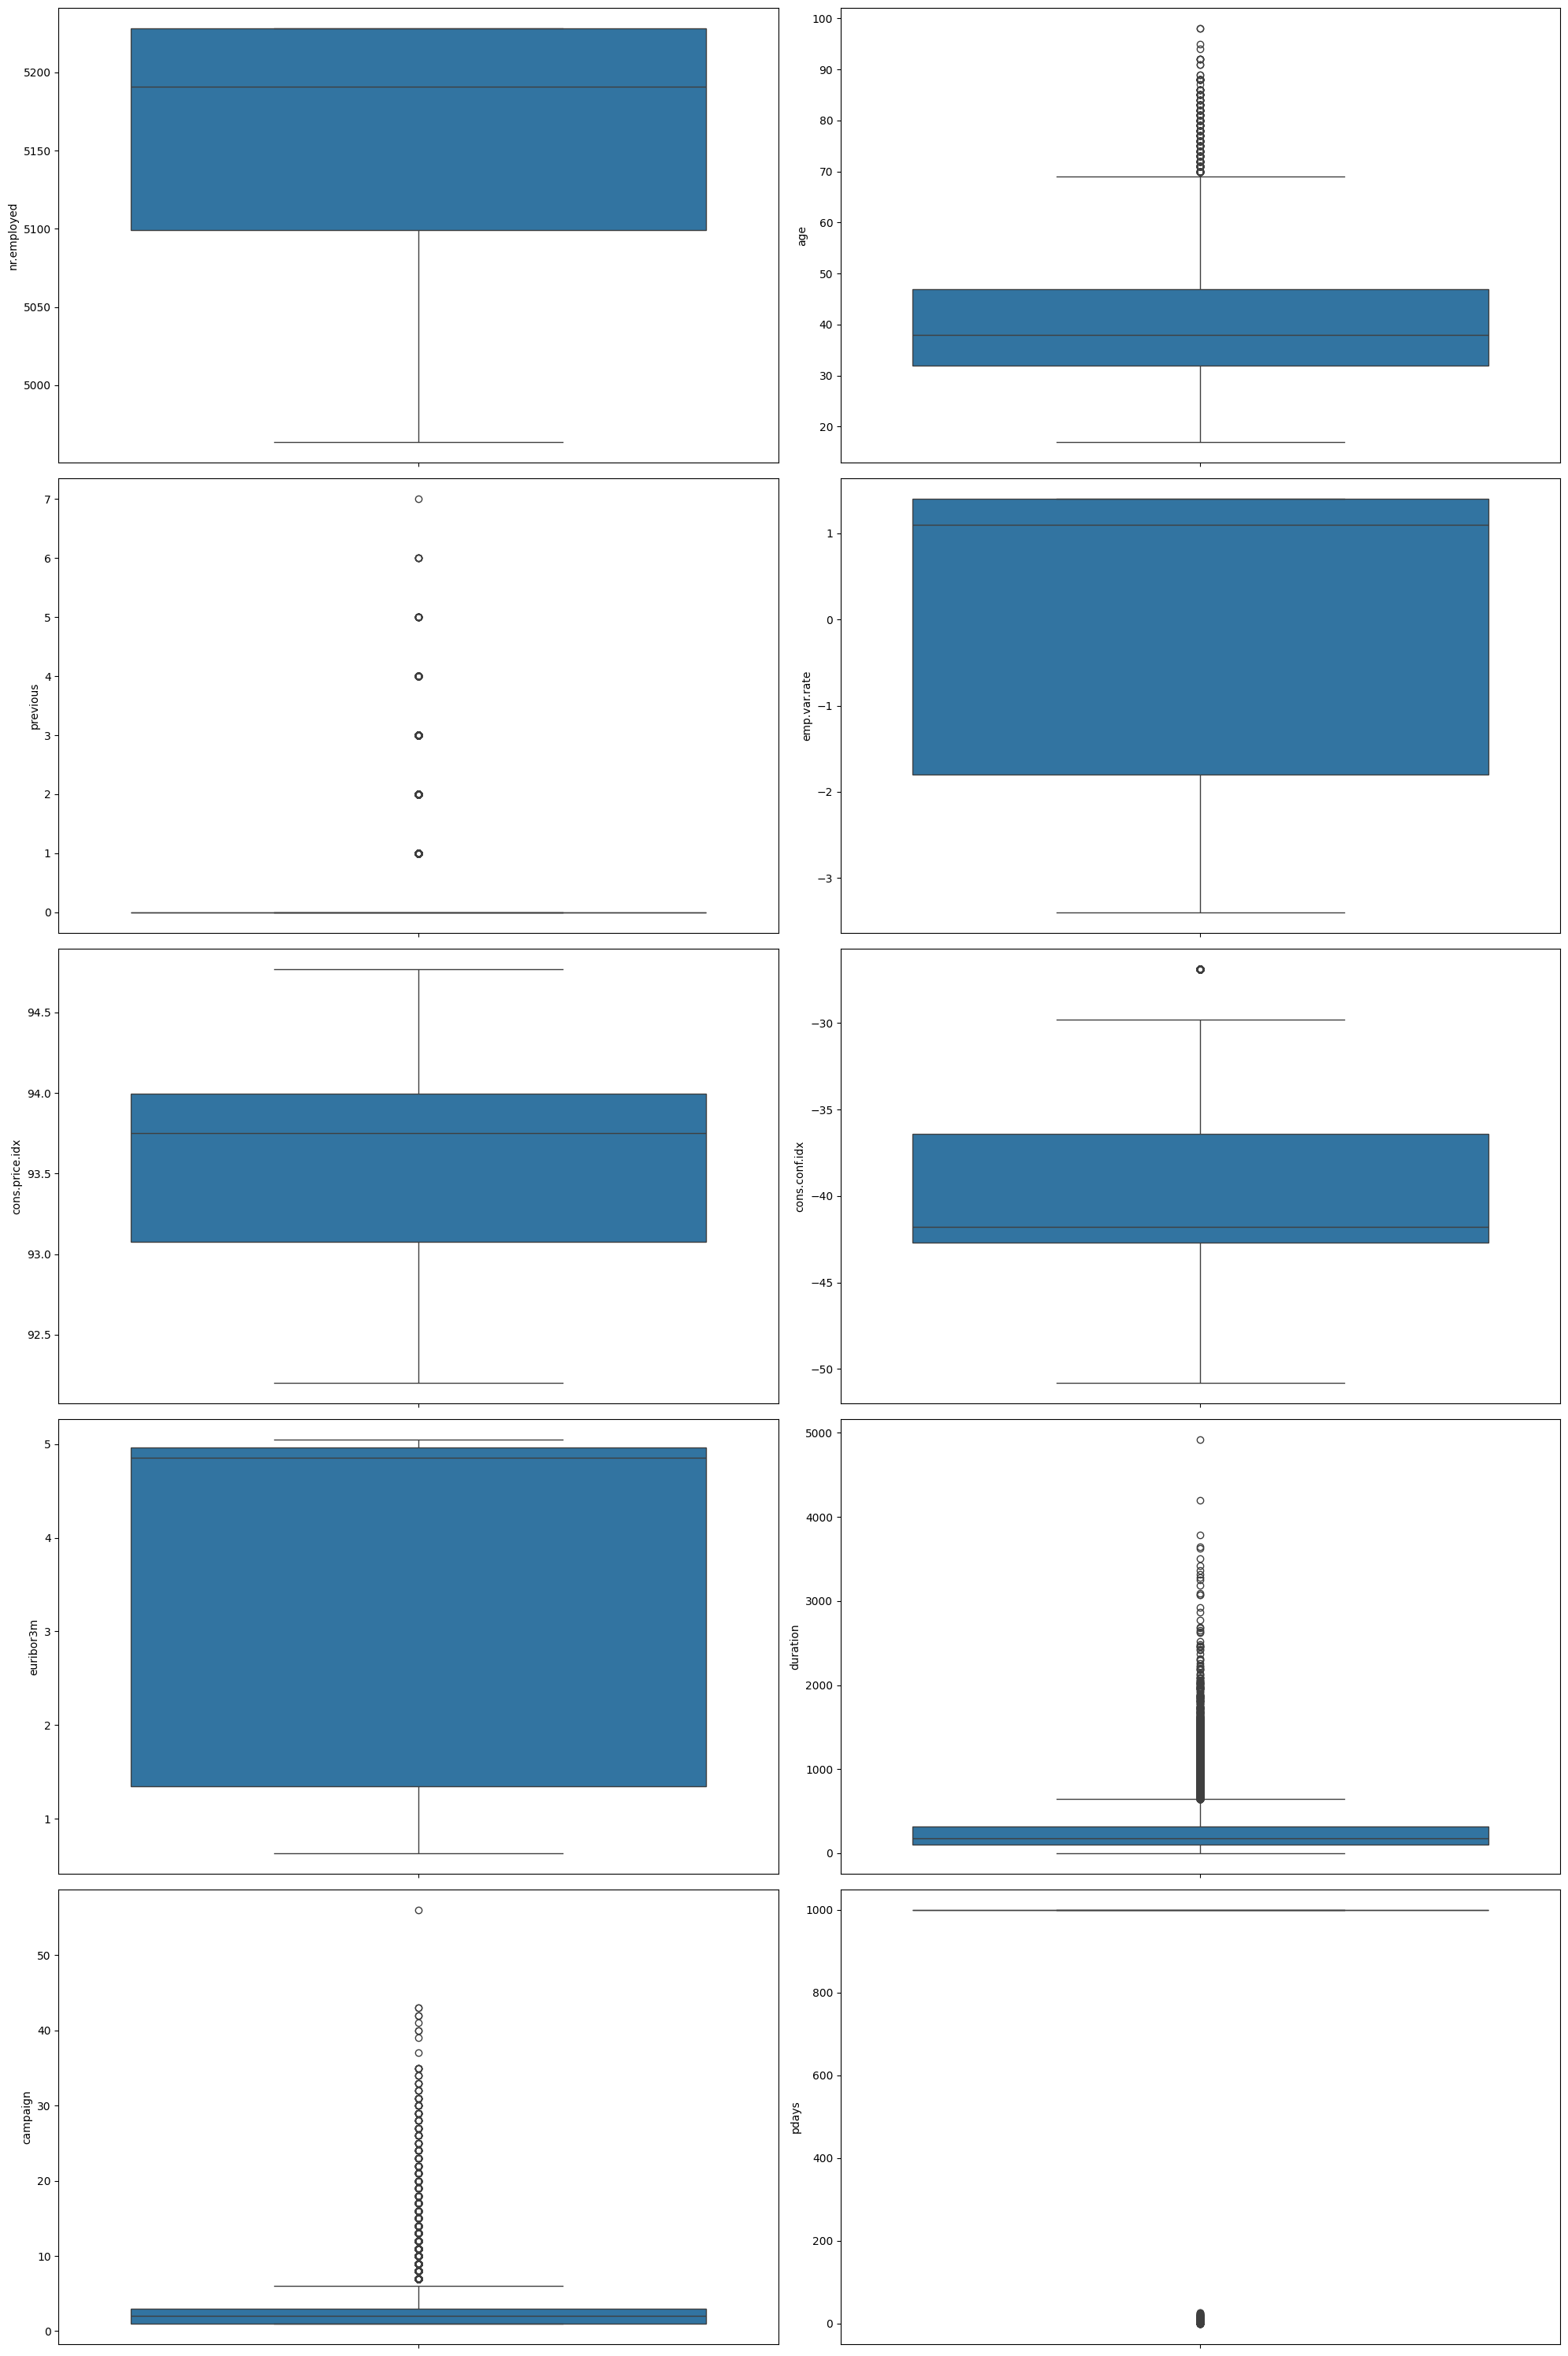

In [133]:
fig, axis = plt.subplots(5, 2, figsize = (20, 30))

sns.boxplot(ax = axis[0, 0], data = clean_data, y = "nr.employed")
sns.boxplot(ax = axis[0, 1], data = clean_data, y = "age")
sns.boxplot(ax = axis[1, 0], data = clean_data, y = "previous")
sns.boxplot(ax = axis[1, 1], data = clean_data, y = "emp.var.rate")
sns.boxplot(ax = axis[2, 0], data = clean_data, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 1], data = clean_data, y = "cons.conf.idx")
sns.boxplot(ax = axis[3, 0], data = clean_data, y = "euribor3m")
sns.boxplot(ax = axis[3, 1], data = clean_data, y = "duration")
sns.boxplot(ax = axis[4, 0], data = clean_data, y = "campaign")
sns.boxplot(ax = axis[4, 1], data = clean_data, y = "pdays")

plt.tight_layout()

plt.show()

Podemos determinar que las variables afectadas por outliers son `age`, `previous`, `cons.conf.idx`, `duration`, `campaign` y `pdays`.

In [134]:
# Generar nuevos archivos, con y sin outliers

clean_data_con_outliers = clean_data.copy()
clean_data_sin_outliers = clean_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["loan_n", "marital_n", "default_n", "poutcome_n", "job_n", "age", "previous", "cons.conf.idx", "duration", "campaign", "pdays"]:
  clean_data_sin_outliers_sin_outliers, limits_list = replace_outliers_from_column(column, clean_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'loan_n': [np.float64(0.0), np.float64(0.0)],
 'marital_n': [0, np.float64(2.5)],
 'default_n': [np.float64(0.0), np.float64(0.0)],
 'poutcome_n': [np.float64(0.0), np.float64(0.0)],
 'job_n': [0, np.float64(7.0)],
 'age': [np.float64(9.5), np.float64(69.5)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'cons.conf.idx': [0, np.float64(-26.949999999999992)],
 'duration': [0, np.float64(644.5)],
 'campaign': [0, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)]}

In [135]:
clean_data_sin_outliers

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,y,y_n,loan_n,housing_n,marital_n,education_n,default_n,contact_n,poutcome_n,job_n
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,261.0,1.0,...,no,0,0.0,0,0.0,0,0.0,0,0.0,0.0
1,57.0,services,married,high.school,unknown,no,no,telephone,149.0,1.0,...,no,0,0.0,0,0.0,1,0.0,0,0.0,1.0
2,37.0,services,married,high.school,no,yes,no,telephone,226.0,1.0,...,no,0,0.0,1,0.0,1,0.0,0,0.0,1.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,151.0,1.0,...,no,0,0.0,0,0.0,2,0.0,0,0.0,2.0
4,56.0,services,married,high.school,no,no,yes,telephone,307.0,1.0,...,no,0,0.0,0,0.0,1,0.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,334.0,1.0,...,yes,1,0.0,1,0.0,4,0.0,1,0.0,5.0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,383.0,1.0,...,no,0,0.0,0,0.0,4,0.0,1,0.0,3.0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,189.0,2.0,...,no,0,0.0,1,0.0,6,0.0,1,0.0,5.0
41186,44.0,technician,married,professional.course,no,no,no,cellular,442.0,1.0,...,yes,1,0.0,0,0.0,4,0.0,1,0.0,4.0


- ANÁLISIS DE VALORES FALTANTES:

La función isnull() es una poderosa herramienta para obtener esta información.

In [136]:
clean_data_con_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
loan_n            0
housing_n         0
marital_n         0
education_n       0
default_n         0
contact_n         0
poutcome_n        0
job_n             0
dtype: int64

In [137]:
clean_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
loan_n            0
housing_n         0
marital_n         0
education_n       0
default_n         0
contact_n         0
poutcome_n        0
job_n             0
dtype: int64

#### Inferencia de nuevas categorías (en éste caso, no realizaremos combinaciones de variables para generar nuevas)

## - ESCALADO DE VALORES (*feature scaling*)

In [138]:
from sklearn.model_selection import train_test_split

vars_clean_data = ["loan_n", "marital_n", "housing_n", "education_n", "default_n", "contact_n", "poutcome_n", "job_n", "age", "duration", "campaign", "pdays", "previous", "nr.employed", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = clean_data_con_outliers.drop('y_n', axis = 1)[vars_clean_data]
X_sin_outliers = clean_data_sin_outliers.drop("y_n", axis = 1)[vars_clean_data]
y = clean_data_con_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/y_train.xlsx", index = False)
y_test.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/y_test.xlsx", index = False)

X_train_con_outliers.head()

,loan_n,marital_n,housing_n,education_n,default_n,contact_n,poutcome_n,job_n,age,duration,campaign,pdays,previous,nr.employed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
12348,1,0,1,2,0,0,0,10,29,286,3,999,0,5228.1,1.4,93.918,-42.7,4.959
8565,0,1,0,6,0,0,0,2,50,178,6,999,0,5228.1,1.4,94.465,-41.8,4.864
21424,0,1,0,6,0,1,0,2,29,103,4,999,0,5228.1,1.4,93.444,-36.1,4.963
3316,0,1,0,6,0,0,0,2,35,135,1,999,0,5191.0,1.1,93.994,-36.4,4.860
33246,0,1,0,1,1,1,0,3,40,418,1,999,0,5099.1,-1.8,92.893,-46.2,1.291


### NORMALIZACIÓN

In [139]:
from sklearn.preprocessing import StandardScaler

# NORMALIZACIÓN DEL DATAFRAME CON OUTLIERS Y GUARDARLO
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\models\Normalizers/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = vars_clean_data)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\models\Normalizers/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = vars_clean_data)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()


,loan_n,marital_n,housing_n,education_n,default_n,contact_n,poutcome_n,job_n,age,duration,campaign,pdays,previous,nr.employed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
12348,1.750366,-0.734095,0.788248,-0.582336,-0.511455,-1.316322,-0.371649,2.600348,-1.058427,0.112453,0.152155,0.195697,-0.348601,0.843413,0.838815,0.589534,-0.470932,0.771196
8565,-0.440002,0.698859,-1.060840,1.248416,-0.511455,-1.316322,-0.371649,-0.679177,0.954767,-0.305973,1.229538,0.195697,-0.348601,0.843413,0.838815,1.534740,-0.276368,0.716413
21424,-0.440002,0.698859,-1.060840,1.248416,-0.511455,0.759693,-0.371649,-0.679177,-1.058427,-0.596546,0.511282,0.195697,-0.348601,0.843413,0.838815,-0.229530,0.955866,0.773502
3316,-0.440002,0.698859,-1.060840,1.248416,-0.511455,-1.316322,-0.371649,-0.679177,-0.483229,-0.472568,-0.566100,0.195697,-0.348601,0.330793,0.647683,0.720860,0.891011,0.714107
33246,-0.440002,0.698859,-1.060840,-1.040024,1.953044,0.759693,-0.371649,-0.269237,-0.003897,0.623862,-0.566100,0.195697,-0.348601,-0.939011,-1.199927,-1.181648,-1.227566,-1.343979


### ESCALADO MÍNIMO-MÁXIMO

In [140]:
from sklearn.preprocessing import MinMaxScaler

# ESCALADO MIN-MAX EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\models\Scalers/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = vars_clean_data)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\models\Scalers/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = vars_clean_data)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS-LINEAL-REGRESSION\data\processed\clean_data_xlsx/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,loan_n,marital_n,housing_n,education_n,default_n,contact_n,poutcome_n,job_n,age,duration,campaign,pdays,previous,nr.employed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
12348,0.5,0.000000,0.5,0.285714,0.0,0.0,0.0,0.909091,0.148148,0.058154,0.036364,1.0,0.0,1.000000,1.000000,0.669135,0.338912,0.980503
8565,0.0,0.333333,0.0,0.857143,0.0,0.0,0.0,0.181818,0.407407,0.036194,0.090909,1.0,0.0,1.000000,1.000000,0.882307,0.376569,0.958966
21424,0.0,0.333333,0.0,0.857143,0.0,1.0,0.0,0.181818,0.148148,0.020943,0.054545,1.0,0.0,1.000000,1.000000,0.484412,0.615063,0.981410
3316,0.0,0.333333,0.0,0.857143,0.0,0.0,0.0,0.181818,0.222222,0.027450,0.000000,1.0,0.0,0.859735,0.937500,0.698753,0.602510,0.958059
33246,0.0,0.333333,0.0,0.142857,0.5,1.0,0.0,0.272727,0.283951,0.084994,0.000000,1.0,0.0,0.512287,0.333333,0.269680,0.192469,0.148946
